<Body>   
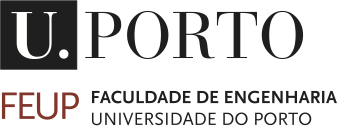   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**Professors:**

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**M. Rosário Pinho** (mrpinho@fe.up.pt)

FEUP, Feb. 2024

---


# **Project - Part 1**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions. At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **April 1st** in your corresponding practical class. Send the files until 23:59 of **May 31, 2024**.


---



# **Project of Control and Optimization (Part I and Part II)**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions (note that you should include your computations in a picture format or in latex). At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **May 20** in your corresponding practical class. Send the files until 23:59 of **May 31, 2024**.


---



In [58]:
# To make a nice pdf file of this file, you have to do the following:
# - upload your file to print into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "name_of_the_file.ipynb"
# Then just download the html file and print it to pdf!

[NbConvertApp] WARNING | pattern 'name_of_the_file.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut

# **Identification**

* **Group:** xx
* **Name:** xxx
* **Student Number:**

* **Name:**
* **Student Number:**

* **Name:**
* **Student Number:**

---




# An Autonomous Underwtare Vehicle (UAV) model in the vertical plan


<Body>   
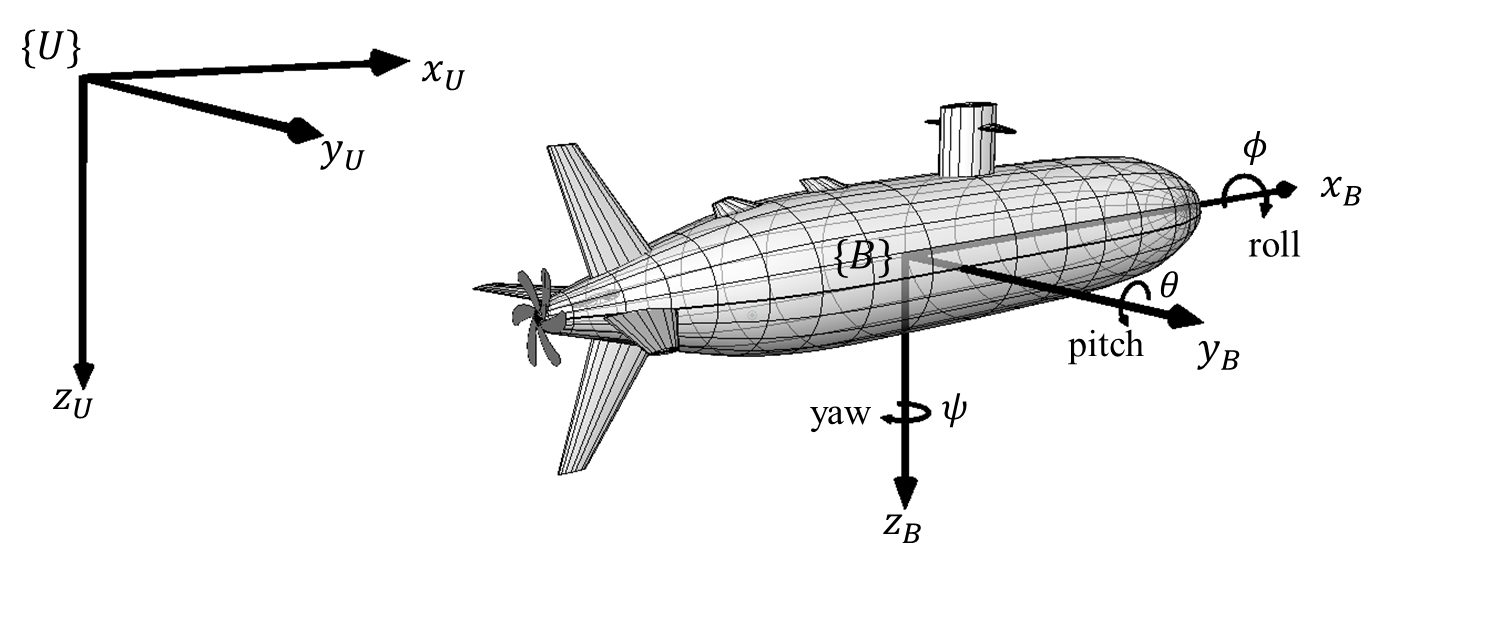

Fig. 1. Coordinate frames, position and orientation variables of an AUV.


Consider an Autonomous Underwater Vehicle (AUV) illustrated in Fig. 1 that can only generate force in $x_B$-direction by means of an actuator composed of an electric motor with a propeller coupled to the shaft.

In this work, the final goal is to design a tracking controller in the vertical plane so that that the vehicle will move according to a desired depth trajectory.


In the vertical plane, the kinematic equations take the form

\begin{align}
 \dot x &= u\cos \theta  + w\sin \theta  \\
 \dot z &=  - u\sin \theta  + w\cos \theta  \\
 \dot \theta  &= q
\end{align}

where $u$, $w$ and $q$ are the linear and angular velocities of the  vehicle, respectively, in surge ($x_B$), heave ($z_B$) and pitch ($\theta$) direction of the body-fixed coordinates $\{B\}$. The Cartesian coordinates of the vehicle's center of mass is denoted by $x$ and $z$, and $\theta$ is the pitch angle.

The simplified equations of motion for surge, heave, and pitch rate when there is no actuated force in $Z_B$ direction (that is, the vehicle is underactuated) yield

\begin{align}
{m_u}\dot u + {m_w}wq + {d_u}(u)u &= \tau_u \\
{m_w}\dot w - {m_u}uq + {d_w}(w)w &= 0 \\
{m_q}\dot q + {m_{uw}}uw + {d_q}(q)q - z_BB\sin\theta &= \tau_q
\end{align}

where $m_u=m-X_{\dot{u}}$, $m_w=m-Z_{\dot{w}}$, $m_q=I_y-M_{\dot q}$ and $m_{uw}=m_u-m_w$ are mass and hydrodynamic added mass terms, $B$ denotes the buoyancy, and the hydrodynamic damping effects are considered to be of the form

\begin{align}
d_u(u) &=-X_u-X_{u|u|}|u| \\
d_w(w) &=-Z_w-Z_{w|w|}|w| \\
d_q(q) &=-M_q-M_{q|q|}|q|
\end{align}


In the above equations, it is assumed that the AUV is neutrally buoyant and that the center of buoyancy can be expressed as $(x_B, y_B, z_B) = (0,0, z_B)$, where $z_B$ is the metacentric height.
The symbols $\tau_u$ and $\tau_q$ denote the actuated force in surge direction and  torque around the $y$-axis of the vehicle, respectively.



# **Part 1: Stability analysis**



We take the practical situation that there exist autopilots controllers in charge of tracking reference signals in $u$ and $q$. Thus, we consider at this stage that the actuation signals are $u$ and $q$.

**1.1** Show that the speed controller given by

\begin{equation}
u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}
\end{equation}

forces the AUV to move with a constant horizontal velocity $v_d$, that is, $\dot x = v_d$. Show also that in this case the equations of motion in the vertical plane of the AUV  reduces to

$\color{blue}{AUV\ model}$

\begin{align*}
\dot x &= v_d \\
\dot z &= - v_d \tan\theta + \frac{1}{\cos\theta}w \\
\dot w &=d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
\dot\theta &= q
\end{align*}

where $z$ is the vertical position (depth) of the AUV, $w$ is the linear velocity along the axis $z_B$ (*heave*), $\theta$ is the angle of *pitch*, and $q$ is the angular velocity around the axis $y_B$.


In the sequel, we will consider that system parameters have the following values (in appropriate units):
$v_d = 1$; $d_1= -3$; $d_2 = -12$, $\bar m = 0.9$

**1.2.**
Let $z_d$ be a given desired depth. Defining the state ${\bf x} = (z-z_d,w,\theta)^⊤$, input ${\bf u}=q$, output ${\bf y}=z-z_d$, write the system in state-space form and linearize it around the origin ${\bf x=0}$.

**1.3.**
Analyze the stability of the origin ${\bf x = 0}$ with ${\bf u=0}$ of the linear and nonlinear system using the **Lyapunov indirect method**.

**1.4**
For $z_d = 1\,m$, plot the **time-evolution** of the state for the nonlinear and linear systems (with $q=0$) for different initial conditions.

Use the numerical integrator `integrate.odeint` of `scipy`.

**1.5**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, $q$ as input and assume that $w=0$.

Prove that the origin of the closed-loop system with control law
\begin{equation}
q = k_1 (z-z_d) - k_2 \theta \tag{1}
\end{equation}
with positive gains $k_1$ and $k_2$ (and $v_d>0$) is asymptotically stable. \\
Use the Lyapunov function
\begin{equation}
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi
\end{equation}


**1.6**
For the above item, confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions with $k_1=k_2=1$.

**1.7**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the control law (1).
Plot the **time-evolution** of the state  for different initial conditions.

# **Part 2: Control Design**



**2.1**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, where $z_d$ is a constant desired depth.
Assuming $q$ as input and $w=0$, design a **Backstepping** Lyapunov based feedback law such that $z(t)$ converges to $z_d$ as $t\to\infty$ and the tracking error system at the origin is AS.

To this end, in the first step of the methodology assume that the **virtual control signal** is $\tan(\theta)$ (and not $\theta$).


**2.2**
Confirm the results through simulation by plotting the **time-evolution** of the state $z(t)$, the tracking error $\tilde z(t)$, the pitch angle $\theta$ and the input signal $q$.

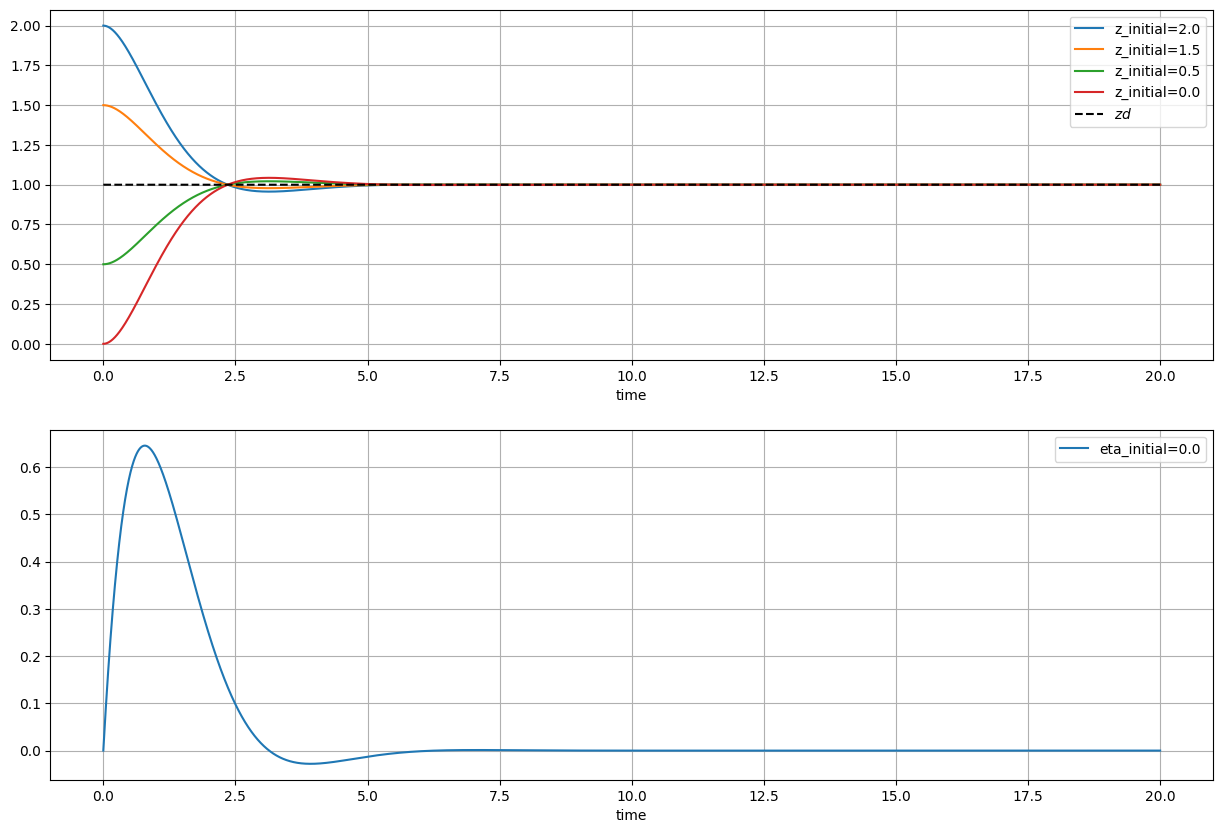

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step function for Euler Method
def step_f(z, eta, zd, vd, K1, K2, dt):
    # Calculate tilde_z
    tilde_z = z - zd
    # Calculate phi
    phi = K1 * tilde_z / vd
    # Calculate tilde_eta
    tilde_eta = eta - phi
    # Calculate derivative of phi
    dot_phi = K1 / vd * (-vd * eta)
    # Calculate control u
    u = -K2 * tilde_eta / (1 + eta**2)
    # Return updated state variables using Euler Method
    return z + (-vd * eta) * dt, eta + (1 + eta**2) * u * dt

# Function to simulate the system
def simulate_system(vd, K1, K2, zd, dt, t_end, z_initial, eta_initial):
    # Create time samples
    t_signal = np.arange(0, t_end, dt)
    zd_signal = zd * np.ones_like(t_signal)
    z_signal = np.zeros_like(t_signal)
    eta_signal = np.zeros_like(t_signal)
    # Initialize state variables
    z_signal[0] = z_initial
    eta_signal[0] = eta_initial
    # Iterate over time samples
    for i in range(t_signal.shape[0] - 1):
        # Update state variables using Euler Method
        z_signal[i+1], eta_signal[i+1] = step_f(z_signal[i], eta_signal[i], zd_signal[i], vd, K1, K2, dt)
    return t_signal, z_signal, eta_signal, zd_signal

# Function to plot results
def plot_results(t_signal, z_signals, zd_signal, eta_signals, z_initial_conditions, eta_initial_conditions):
    # Create a figure
    fig, axs = plt.subplots(2, figsize=(15, 10))
    # Plot z and zd for different initial conditions
    for z_initial, z_signal in zip(z_initial_conditions, z_signals):
        axs[0].plot(t_signal, z_signal, label=f'z_initial={z_initial}')
    axs[0].plot(t_signal, zd_signal, 'k--', label='$zd$')
    axs[0].set_xlabel("time")
    axs[0].grid()
    axs[0].legend(loc='best')

    # Plot eta for different initial conditions
    for eta_initial, eta_signal in zip(eta_initial_conditions, eta_signals):
        axs[1].plot(t_signal, eta_signal, label=f'eta_initial={eta_initial}')
    axs[1].set_xlabel("time")
    axs[1].grid()
    axs[1].legend(loc='best')

    plt.show()

# Parameters
dt = 0.001
t_end = 20
vd = 1
zd = 1
K1 = 1
K2 = 0.25 * (vd + 2 * vd * K1 + K1**2) + 1
z_initial_conditions = [2.0, 1.5, 0.5, 0.0]  # Example initial conditions for z
eta_initial_conditions = [0.0]  # Example initial conditions for eta

# Simulate and plot
z_signals = []
eta_signals = []
for z_initial in z_initial_conditions:
    for eta_initial in eta_initial_conditions:
        t_signal, z_signal, eta_signal, zd_signal = simulate_system(vd, K1, K2, zd, dt, t_end, z_initial, eta_initial)
        z_signals.append(z_signal)
        eta_signals.append(eta_signal)


plot_results(t_signal, z_signals, zd_signal, eta_signals, z_initial_conditions, eta_initial_conditions)

**2.3**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the backstepping control law.
Plot the **time-evolution** of the state  for different initial conditions.


**2.4**
For the same conditions stated in **2.1**, design a **sliding mode controller** and confirm the results through simulation.
For the sliding surface use
$$
s = \dot{\tilde z} + \lambda \tilde z, \quad \lambda>0
$$




**2.5 (Extra)**
For the linearized system in **1.2**, design a **LQR controller** and confirm the results through simulation.



**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).